In [ ]:
# iOSのカメラ機能を使うためのモジュールを読み込む
from avfoundation.take_pick_photo import * 

src_file = "src_img.png"      # 撮影画像を格納するファイル
take_photo_and_save(src_file) # 写真を撮る(写真やアルバムからも読める)

In [ ]:
import speech.speech_recognizer as sr
import time

# 言語を指定して、音声認識用のクラスをインスタンス化する
myRecognizer = sr.Recognizer("en-US",# 英語なら"en-US"
                             True)   # 句読点等の自動認識
myRecognizer.prepare()     # 音声認識の準備をする
myRecognizer.start()       # 音声認識を10秒間行う
time.sleep(10)
myRecognizer.stop()     
print(myRecognizer.result) # 認識した音声を出力する
_prompt = myRecognizer.result

In [ ]:
#conda install -c anaconda whisper
import openai

openai.api_key = '*******'

# OpenAI の音声認識APIを呼ぶ
audio_file= open("sample_voice.wav", "rb")
transcript = openai.Audio.transcribe(
    "whisper-1", audio_file)
# 認識されたテキスト内容をプロンプトに入れる
print(transcript)
_prompt =transcript["text"]

In [28]:
from PIL import Image

# 撮影画像をDALLE-E処理用にリサイズする
src_image = Image.open(src_file).resize((256, 256))
src_image.save("{}.png".format(src_file))

# DALL-Eに画像を描き直させる場所を指定する「マスク情報」を読み込む
mask_file = "mask_img.png"
mask_image =  # アルファチャンネルとして格納するためにグレイ画像に変換
  Image.open(mask_file).resize((256, 256)).convert('L')
# アルファ(A)チャンネルにマスク情報、RGBには元画像を入れたRGBA PNG画像を作る
rgba_mask_image = src_image.copy()
rgba_mask_image.putalpha(mask_image)
rgba_mask_image.save("{}.png".format(mask_file))

In [ ]:
import openai
import json
from base64 import b64decode

openai.api_key = '*******' # 各自のシークレットキー

# 音声認識結果をプロンプトとして設定する
#_prompt = "Supehero astronaut wearing suit"
_prompt = myRecognizer.result

# OpenAI APIを呼ぶ
response = openai.Image.create_edit(
    image = open("{}.png".format(src_file), "rb"),
    mask  = open("{}.png".format(mask_file), "rb"),
    prompt = _prompt, n=3, size="256x256",
    response_format="b64_json",
)
# 得られた結果をPNG画像として保存する
png_files = [src_file] # 元の撮影画像やDALLE-E生成の画像を格納
for index, image_dict in enumerate(response["data"]):
    image_data = b64decode(image_dict["b64_json"])
    png_file = f"mod_images-{index}.png"
    with open(png_file, mode="wb") as png:
        png.write(image_data)
        png_files.append(png_file)

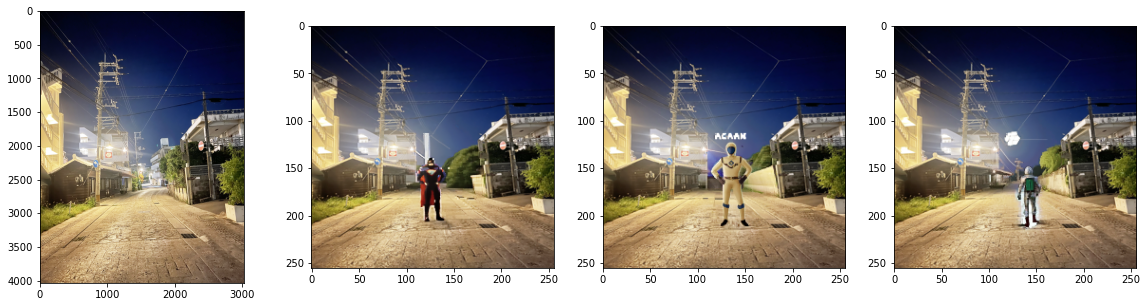

In [42]:
from PIL import Image
from matplotlib import pylab as plt
               
l = len(png_files)
plt.figure(figsize=[20,5])
for i in range(l):  # 各PNG画像を並べて表示する
    plt.subplot(1,l,i+1)
    pil_img = Image.open(png_files[i]) 
    plt.imshow(pil_img)